In [1]:
pip install split_folders

In [2]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

import os
import zipfile
import splitfolders

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-04 09:22:03--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.23MB/s    in 76s     

2021-07-04 09:23:20 (4.05 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(base_dir, output = "/tmp/rockpaperscissors", seed = 1337, ratio = (.6, .4))

train_dir = os.path.join("/tmp/rockpaperscissors", "train")
validation_dir = os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:00, 3554.05 files/s]


In [6]:
rock_dir = os.path.join (base_dir, 'rock')
paper_dir = os.path.join (base_dir, 'paper')
scissors_dir = os.path.join (base_dir, 'scissors')

In [7]:
train_rock_dir, val_rock_dir = train_test_split (os.listdir (rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split (os.listdir (paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split (os.listdir (scissors_dir), test_size = 0.4)

In [8]:
train_rock = os.path.join (train_dir, 'rock')
val_rock = os.path.join (validation_dir, 'rock')
train_paper = os.path.join (train_dir, 'paper')
val_paper = os.path.join (validation_dir, 'paper')
train_scissors = os.path.join (train_dir, 'scissors')
val_scissors = os.path.join (validation_dir, 'scissors')

In [9]:
train_datagen = ImageDataGenerator(
                    rescale = 1./225,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale = 1./225,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150,150),
        batch_size = 32,
        class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150,150),
        batch_size = 32,
        class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [13]:
model.compile(loss='categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy'])

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
)

Epoch 1/20
25/25 [==============================] - 44s 2s/step - loss: 1.0968 - accuracy: 0.4350 - val_loss: 0.8572 - val_accuracy: 0.6625
Epoch 2/20
25/25 [==============================] - 42s 2s/step - loss: 0.5696 - accuracy: 0.7750 - val_loss: 0.4111 - val_accuracy: 0.8750
Epoch 3/20
25/25 [==============================] - 42s 2s/step - loss: 0.3167 - accuracy: 0.9013 - val_loss: 0.3775 - val_accuracy: 0.8438
Epoch 4/20
25/25 [==============================] - 42s 2s/step - loss: 0.2612 - accuracy: 0.9075 - val_loss: 0.2345 - val_accuracy: 0.9250
Epoch 5/20
25/25 [==============================] - 42s 2s/step - loss: 0.2566 - accuracy: 0.9237 - val_loss: 0.1641 - val_accuracy: 0.9375
Epoch 6/20
25/25 [==============================] - 42s 2s/step - loss: 0.2176 - accuracy: 0.9287 - val_loss: 0.2486 - val_accuracy: 0.8938
Epoch 7/20
25/25 [==============================] - 44s 2s/step - loss: 0.1618 - accuracy: 0.9400 - val_loss: 0.1533 - val_accuracy: 0.9375
Epoch 8/20
25/25 [==

Saving 2ZPcSpOm7SEfQYwg.png to 2ZPcSpOm7SEfQYwg.png
2ZPcSpOm7SEfQYwg.png
Scissor


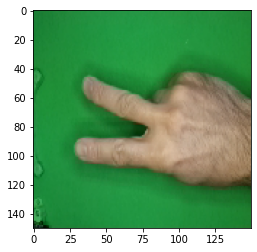

In [15]:
%matplotlib inline

photo = files.upload()

for fn in photo.keys():

    path = fn
    img = image.load_img(path, target_size = (150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    print(fn)

    if classes[0][0] == 1:
        print('Paper')
    elif classes [0][1] == 1:
        print('Rock')
    elif classes[0][2] == 1:
        print('Scissor')